In [2]:
options(warn = -1)

In [3]:
library("ggtern")

Loading required package: ggplot2
--
Consider donating at: http://ggtern.com
Even small amounts (say $10-50) are very much appreciated!
Remember to cite, run citation(package = 'ggtern') for further info.
--

Attaching package: 'ggtern'

The following objects are masked from 'package:ggplot2':

    aes, annotate, calc_element, ggplot, ggplot_build, ggplot_gtable,
    ggplotGrob, ggsave, layer_data, layer_grob, layer_scales, theme,
    theme_bw, theme_classic, theme_dark, theme_get, theme_gray,
    theme_light, theme_linedraw, theme_minimal, theme_set, theme_void



In [4]:
data("Feldspar")

In [5]:
scale_T_continuous(name = "Test T", limits = c(0,1), breaks = c(0, .333, .667, 1), minor_breaks = NULL, labels = c("0", "1/3", "2/3", "1"))

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

In [6]:
base = ggtern(data=Feldspar,aes(Ab,An,Or))

### Note: Still haven't figured out if there's a way to change the line weights.

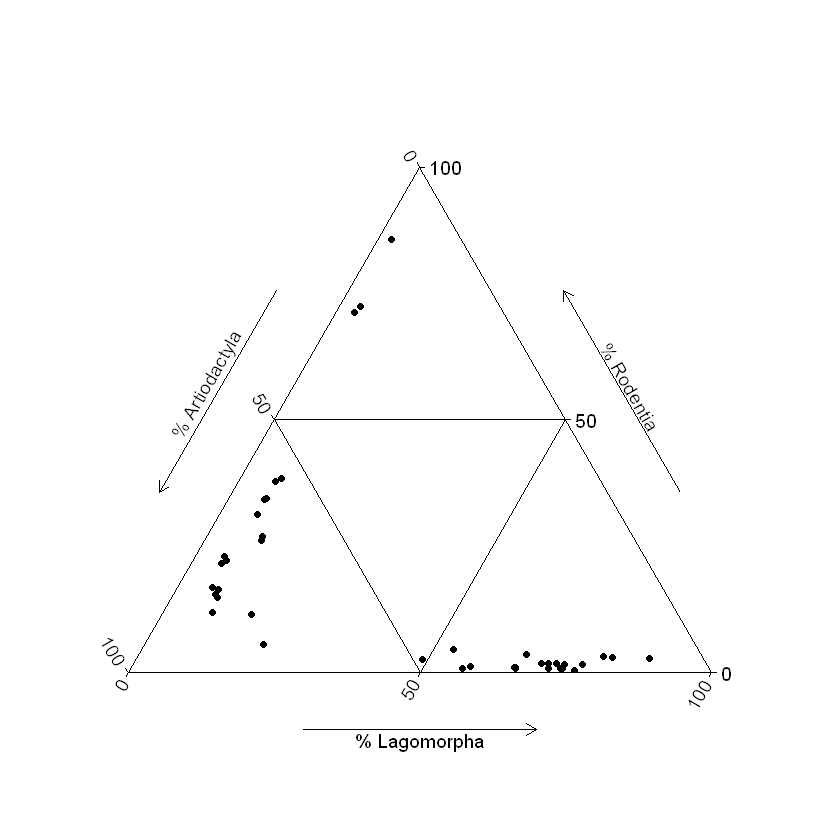

In [7]:
base +
geom_point() +
theme_linedraw(base_size = 14, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

### This creates a inkscape readable svg file quite simply. Changing size or scale isn't the best idea, apparently, as it doesn't scale the text.

In [8]:
ggsave("ternarytest.svg", device="svg")

Saving 6.67 x 6.67 in image


### The below can be used to create the basic unadorned troika plot - for use in discussion of "quarters".

In [37]:
df <- data.frame(x=c(1/3,2/3,1/6,1/6), y=c(1/3,1/6,2/3,1/6), z=c(1/3, 1/6, 1/6, 2/3), label=c("Mixed", "Artiodactyl", "Rodent", "Lagomorph"))
base = ggtern(df, aes(x, y, z, label = label))
qs = base +
geom_text(size = 3) + 
theme_linedraw(base_size = 14, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

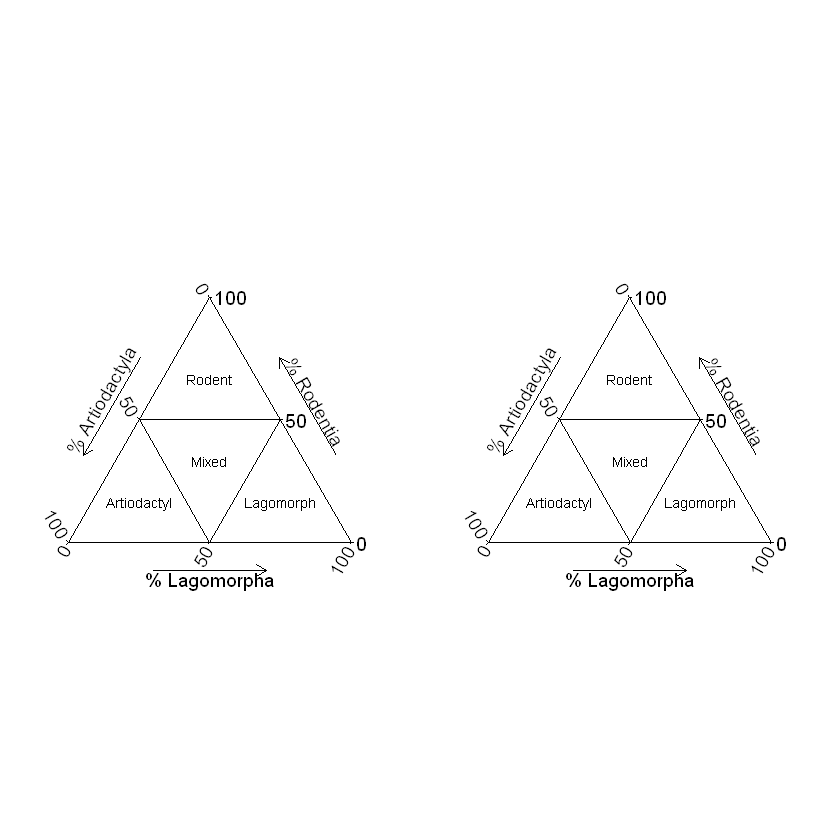

In [40]:
sidebyside = grid.arrange(qs, qs, nrow=1) #doing this to get the size the same as for the data plots that are also 2-wide

In [42]:
ggsave("quarters.svg", plot=sidebyside, device="svg")

Saving 6.67 x 6.67 in image


### Quick test of area graphs -- values are being created randomly based on the seed

In [11]:
set.seed(234)
Sector <- rep(c("S01","S02","S03","S04","S05","S06","S07"),times=7)
Year <- as.numeric(rep(c("1950","1960","1970","1980","1990","2000","2010"),each=7))
Value <- runif(49, 10, 100)
data <- data.frame(Sector,Year,Value)

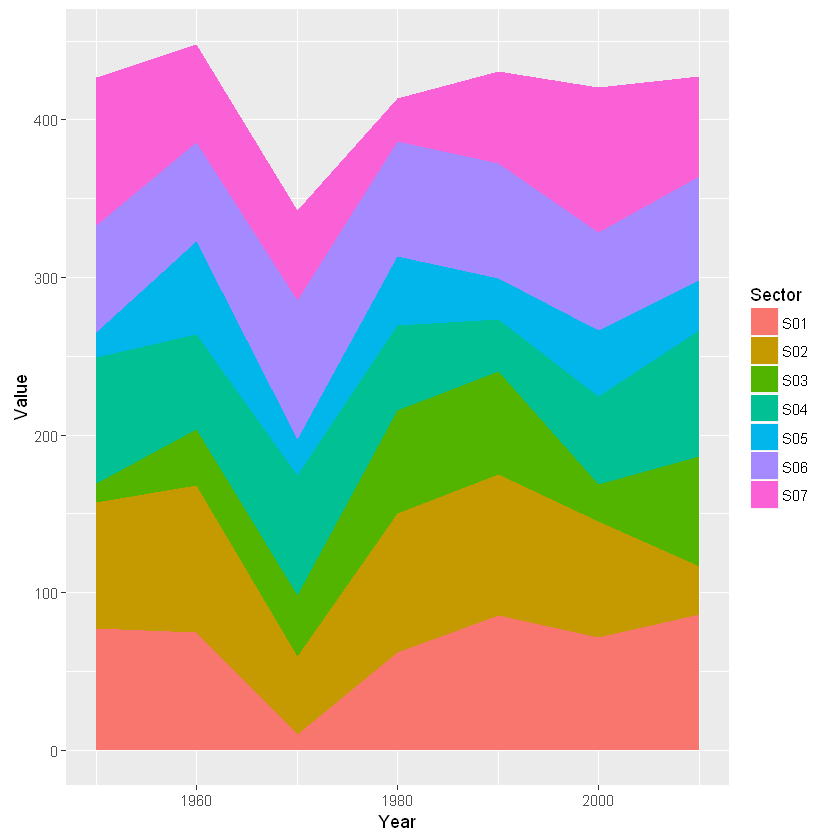

In [12]:
ggplot(data, aes(x=Year, y=Value, fill=Sector)) + geom_area()

### Trying to create scatterplot (of fake data) and matching ternary plot

In [13]:
X <- runif(20, 0, .9)
Y <- sapply(X, function(x) runif(1, 0, 1-x))
Z <- 1 - X - Y
dftest = data.frame(X, Y, Z)

In [14]:
head(dftest)

X,Y,Z
0.11367714,0.53371826,0.35260460
0.57150152,0.39971307,0.02878541
0.34197938,0.22805023,0.42997040
0.13852059,0.50448352,0.35699589
0.72695794,0.08532949,0.18771258
0.07110104,0.06262000,0.86627896


In [15]:
plotXY <- ggplot(dftest, aes(x=X, y=Y, size=2)) + theme_bw() + geom_point() + xlim(0, 1) + ylim(0, 1) +
  theme_linedraw(base_size = 14, base_family = "") +
  scale_size_identity() + 
  coord_fixed() +
  scale_y_continuous(name = "% Y", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_x_continuous(name = "% X", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  theme(panel.border = element_blank())

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


In [16]:
plotTernary <- ggtern(data=dftest,aes(Z, Y, X, size=2)) + scale_size_identity() +
theme_linedraw(base_size = 14, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Y") + Rarrowlab("% X") + Larrowlab("% Z") + theme_showarrows() + 
geom_point()


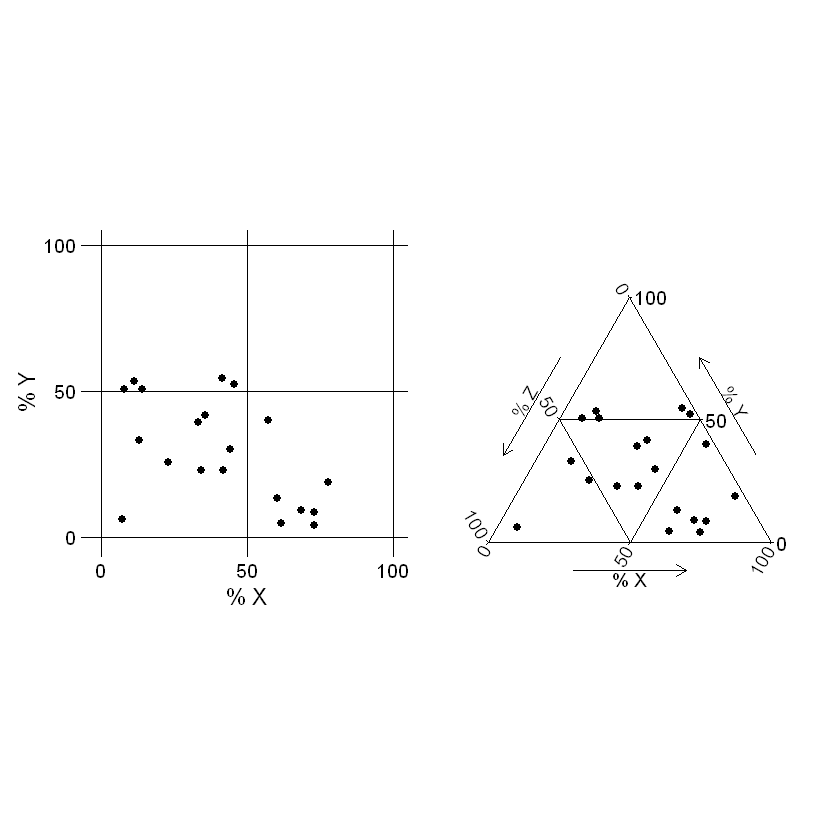

In [17]:
sidebyside = grid.arrange(plotXY, plotTernary, nrow=1)

In [106]:
ggsave("xy-ternary_comparison.svg", plot=sidebyside, device="svg")

Saving 6.67 x 6.67 in image


## CRITICAL
### Note that to make the x and y axes "match" requires feeding ggtern the z axis in the x position!


# Random Testing Area

In [ ]:
(sizes <- expand.grid(size = (0:3) * 2, stroke = (0:3) * 2))

In [ ]:
ggplot(sizes, aes(size, stroke, size = 1, stroke = stroke)) + 
  geom_point(shape = 21, fill = "red") +
  scale_size_identity()

In [ ]:
testData